การใช้ K-means clustering จัดกลุ่มสินค้าเป็น 5 กลุ่ม จากสินค้า 10 ชนิด โดยมีข้อมูลเกี่ยวกับสินค้า คือ ราคา กับ คะแนนความนิยม

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


In [4]:
# สร้าง dataset ของข้อมูลเกี่ยวกับสินค้า
np.random.seed(0)

In [5]:
# ชื่อสินค้า
product_names = ['T-shirt', 'Jeans', 'Sneakers', 'Watch', 'Backpack', 'Headphones', 'Smartphone', 'Laptop', 'Camera', 'Gaming console']

# ข้อมูลเกี่ยวกับสินค้า
product_features = np.array([[200, 50, 150, 5000, 100, 2000, 15000, 40000, 30000, 20000],   # ราคา (บาท)
                             [0.2, 0.5, 0.3, 0.1, 0.5, 0.1, 0.2, 1.5, 1, 2]])           # ความนิยม (คะแนน 0-1)

# สุ่มตำแหน่งของข้อมูล
X = product_features.T + 0.1 * np.random.randn(10, 2)


In [8]:
# แสดงในรุปแบบ dataframe
df = pd.DataFrame(product_features)
df

,0,1,2,3,4,5,6,7,8,9
0,200.0,50.0,150.0,5000.0,100.0,2000.0,15000.0,40000.0,30000.0,20000.0
1,0.2,0.5,0.3,0.1,0.5,0.1,0.2,1.5,1.0,2.0


In [21]:
# แสดงในรุปแบบ dataframe
df1 = pd.DataFrame(X)
df1

,0,1
0,200.176405,0.240016
1,50.097874,0.724089
2,150.186756,0.202272
3,5000.095009,0.084864
4,99.989678,0.541060
5,2000.014404,0.245427
6,15000.076104,0.212168
7,40000.044386,1.533367
8,30000.149408,0.979484
9,20000.031307,1.914590


In [22]:
# # กำหนดจำนวนกลุ่ม (clusters = 3) ที่ต้องการจัดกลุ่ม
# from sklearn.cluster import KMeans

# # สร้างออบเจกต์ KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)

# # ฝึกสอนโมเดล
# kmeans.fit(X)

# # ได้ label ของแต่ละตัวอย่างข้อมูล
# labels = kmeans.labels_

# # แสดงผลลัพธ์
# for i, product in enumerate(product_names):
#     print(f"{product}: Cluster {labels[i]}")

In [23]:
# # แสดง label ของแต่ละ data point
# # แสดงข้อมูลของแต่ละ data point พร้อมกับ label
# for i, label in enumerate(kmeans.labels_):
#     print(f"Data point {i}: {X[i]} - Label {label}")


In [24]:
# # วาด scatter plot ของข้อมูล โดยให้แต่ละกลุ่มมีสีต่างกัน
# import matplotlib.pyplot as plt

# # สีสำหรับแต่ละกลุ่ม
# colors = ['r', 'g', 'b']

# # วาด scatter plot
# fig, ax = plt.subplots()
# for i, label in enumerate(kmeans.labels_):
#     ax.scatter(X[i, 0], X[i, 1], color=colors[label])

# # ตั้งค่าชื่อแกน
# ax.set_xlabel('price (Bath)')
# ax.set_ylabel('Popularity (Score 0-1)')
# ax.set_title('Scatter Plot Product')

# plt.show()

In [25]:
n_clusters = 3

# สร้าง KMeans object และ fit กับ dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [26]:
# แสดง centroid ของแต่ละกลุ่ม
print('Centroids:', kmeans.cluster_centers_)

Centroids: [[1.25009335e+03 3.39621455e-01]
 [3.50000969e+04 1.25642580e+00]
 [1.75000537e+04 1.06337896e+00]]


In [27]:
# แสดง label ของแต่ละ data point
labels = kmeans.labels_
print('Labels:', labels)

Labels: [0 0 0 0 0 0 2 1 1 2]


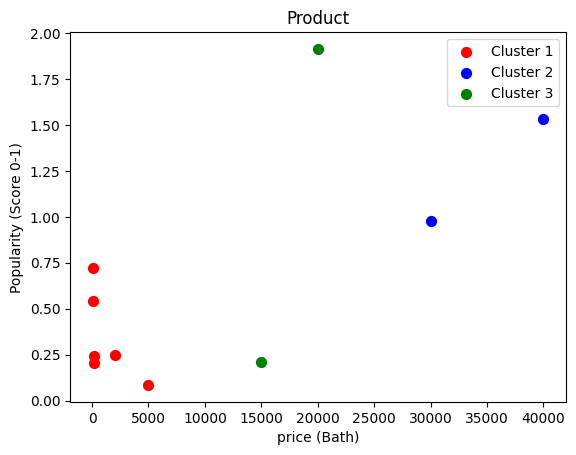

In [28]:
# สร้าง scatter plot ของข้อมูล โดยให้แต่ละกลุ่มมีสีต่างกัน
colors = ['red', 'blue', 'green']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label='Cluster %d' % (i + 1))


# ปรับแต่งกราฟ
plt.title('Product')
plt.xlabel('price (Bath)')
plt.ylabel('Popularity (Score 0-1)')
plt.legend()
plt.show()
